# Import necessary libraries and load dataset



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load data from CSV files
df_80 = pd.read_csv('./churn-bigml-80.csv')
df_20 = pd.read_csv('./churn-bigml-20.csv')

In [3]:
# Combine the datasets
df = pd.concat([df_20, df_80])

# Display basic information about the data
print("Data Information:")
print(df.info())

# Display a few rows of the data
print("\nSample Data:")
print(df.head())

Data Information:
<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      333

# Clean Data and EDA

In [ ]:
# Handle missing values
print("Checking for missing values:")
print(df.isnull().sum())

In [5]:
# Handle duplicate values
print("Checking for duplicate values:")
print(df.duplicated().sum())

# # If there are duplicate values, remove them
# df.drop_duplicates(inplace=True)
# print("Data after removing duplicates:")
# print(df.info())

Checking for duplicate values:
0


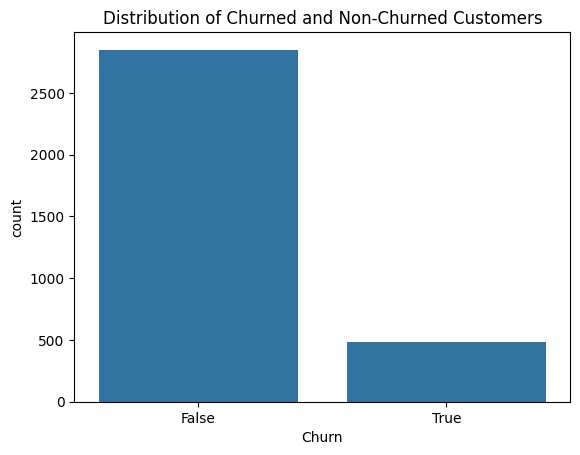

       Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.25943

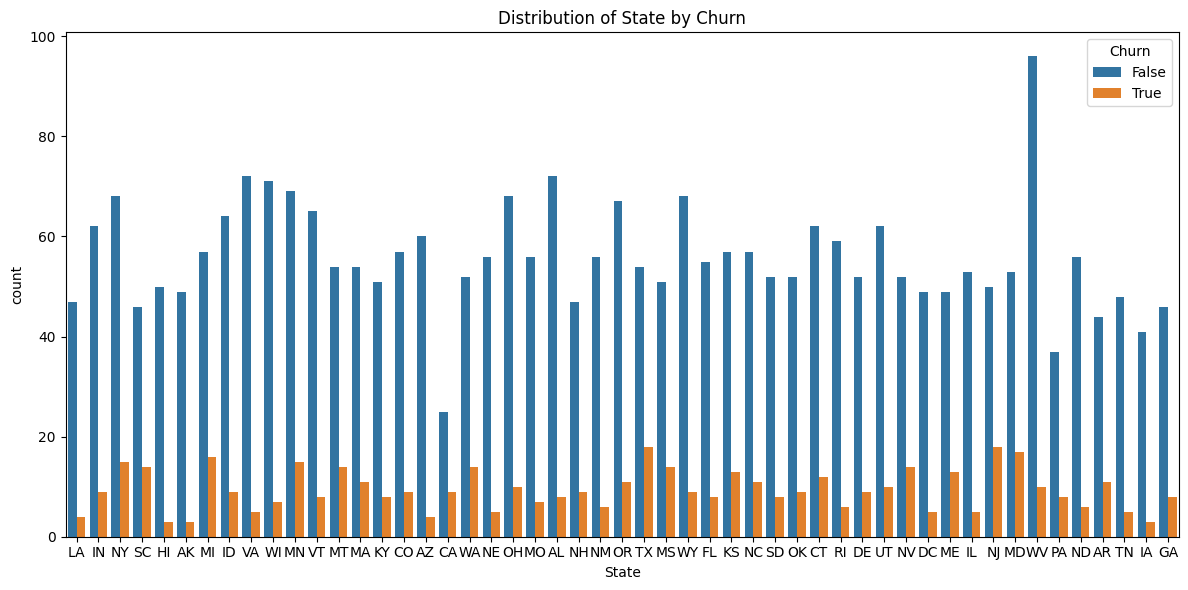

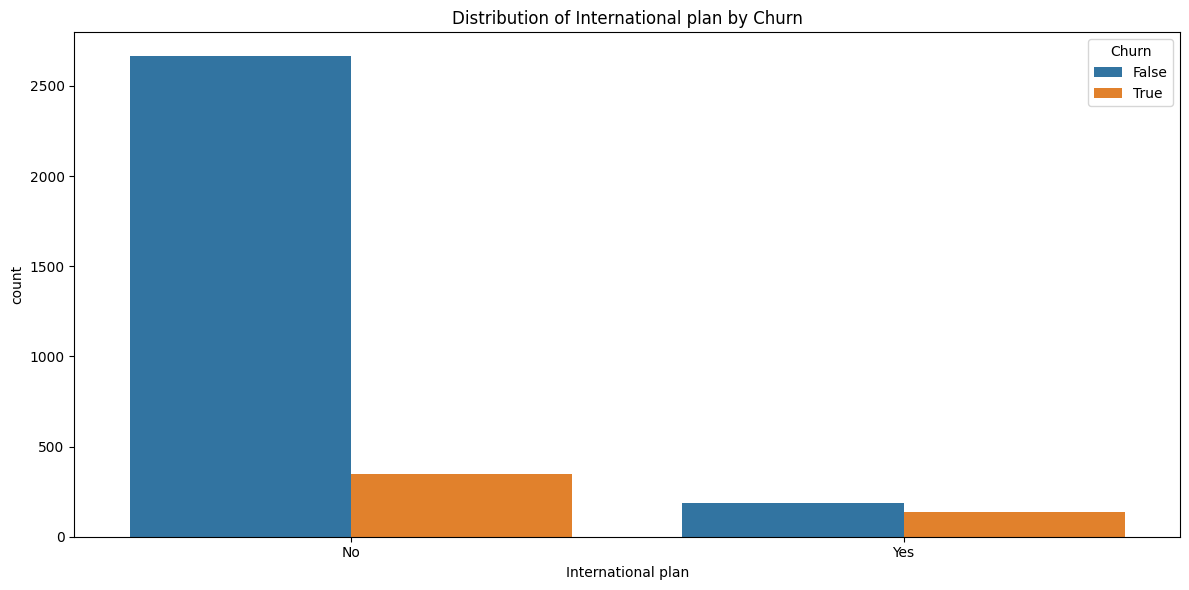

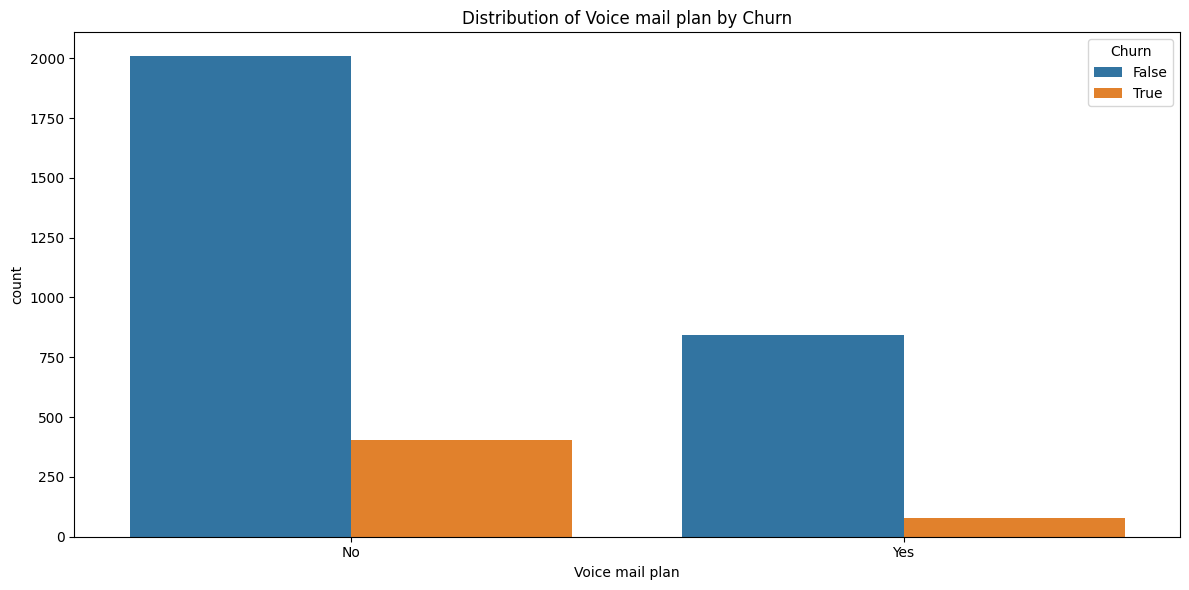

In [6]:
# Exploratory Data Analysis (EDA)
# Distribution of the target variable (Churn)
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churned and Non-Churned Customers')
plt.show()

# Conclusion: The dataset is imbalanced with more non-churned customers than churned customers.

# Analyze numerical features
print(df.describe())

# Conclusion: The summary statistics provide insights into the central tendency and dispersion of numerical features.

# Analyze categorical features
categorical_features = ['State', 'International plan', 'Voice mail plan']
for feature in categorical_features:
    plt.figure(figsize=(12, 6))  
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Distribution of {feature} by Churn')
    plt.tight_layout() 
    plt.show()

# Conclusion: 
# 1. Customers with an international plan are more likely to churn.
# 2. The distribution of churn across different states varies.
# 3. Customers with a voice mail plan are less likely to churn.

1. **Distribution of the target variable (Churn)**:
    - The distribution chart of the target variable (Churn) shows that the number of customers who did not churn (Non-Churned) is higher than the number of customers who churned (Churned). This indicates that the churn rate in this dataset is quite low.

2. **Analysis of categorical features**:
    - **State**: The distribution chart of the `State` variable by `Churn` shows that the churn rate may vary between states. Some states have higher churn rates compared to others.
    - **International plan**: The distribution chart of the `International plan` variable by `Churn` shows that customers with an international plan have a higher churn rate compared to those without an international plan.
    - **Voice mail plan**: The distribution chart of the `Voice mail plan` variable by `Churn` shows that customers with a voice mail plan have a lower churn rate compared to those without a voice mail plan.

3. **Analysis of numerical features**:
    - **Total day minutes**: Customers with higher total day minutes tend to churn more.
    - **Customer service calls**: Customers with a higher number of customer service calls tend to churn more. This may indicate that customers are dissatisfied with the service and therefore tend to leave.

# Data preprocessing

In [7]:
# Data preprocessing
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].astype(int)

In [8]:
# Split the data into training and testing sets
X = df.drop(['State', 'Churn'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating models

In [10]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

c:\Users\ktcop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.861967802910527


c:\Users\ktcop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
# Train the logistic regression model with the best parameters
model = LogisticRegression(**best_params)
model.fit(X_train, y_train)

LogisticRegression(C=10, solver='liblinear')

In [17]:
# Predict and evaluate the model
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       571
           1       0.55      0.23      0.32        96

    accuracy                           0.86       667
   macro avg       0.72      0.60      0.62       667
weighted avg       0.83      0.86      0.84       667


Accuracy Score:
0.8620689655172413


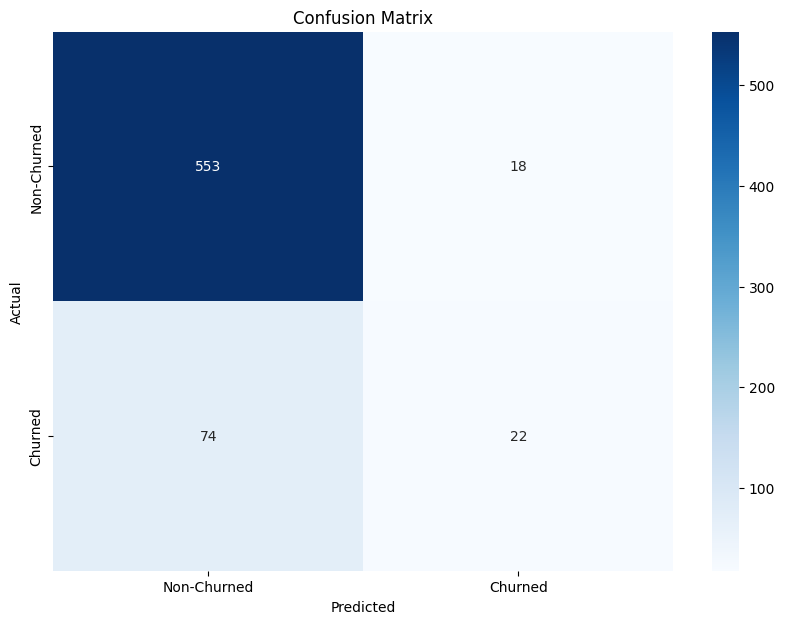

In [16]:
# Vẽ ma trận nhầm lẫn bằng seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churned', 'Churned'], yticklabels=['Non-Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Feature importance
importance = model.coef_[0]
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
Customer service calls    0.647606
International plan        0.590207
Total intl charge         0.411746
Total day charge          0.381198
Total day minutes         0.352531
Number vmail messages     0.305101
Total eve minutes         0.180267
Total eve charge          0.148957
Total night charge        0.110602
Total night minutes       0.073273
Total day calls           0.059694
Account length            0.023051
Total eve calls          -0.023130
Area code                -0.025977
Total night calls        -0.038386
Total intl minutes       -0.178305
Total intl calls         -0.201269
Voice mail plan          -0.716894
dtype: float64


## Insight from Feature Importance

1. **Customer service calls**: The number of customer service calls has the highest positive importance. This indicates that customers who make more customer service calls are more likely to churn, possibly due to dissatisfaction with the service.

2. **International plan**: Customers with an international plan have a higher likelihood of churning. This could be due to higher costs or dissatisfaction with the international service.

3. **Total intl charge**: The total international charge is also a significant factor. Customers with higher international charges tend to churn more.

4. **Total day charge**: The total day charge is another important factor. Customers with higher day charges are more likely to churn, possibly due to higher costs.

5. **Total day minutes**: The total day minutes also play a significant role. Customers who use more day minutes tend to churn more, possibly due to dissatisfaction with the service.

6. **Number vmail messages**: The number of voicemail messages is also important. Customers with more voicemail messages tend to churn more, possibly due to dissatisfaction with the service.

7. **Voice mail plan**: The voicemail plan has a negative importance, indicating that customers with a voicemail plan are less likely to churn.

## 4. What actions regarding qualitative and quantitative analytics could be implemented to enhance retention rate?
## Actions to enhance retention rate
### Qualitative Analytics: 
- Conduct customer surveys and feedback sessions to understand the reasons behind churn.
- Use this information to improve customer service and address pain points.
### Quantitative Analytics: 
- Analyze customer usage patterns and identify early warning signs of churn.
- Implement targeted marketing campaigns and personalized offers to retain at-risk customers.